                            PROJETO FINAL - DADOS DE CRÉDITO

Os dados mostram informações de clientes de uma instituição financeira. A ideia é explicar os motivos pelo qual certos clientes se tornam inadimplentes, ou seja, não honram suas dívidas.

A tabela abaixo mostra cada variável da nossa base:

| Coluna  | Descrição |
| ------- | --------- |
| id      | Número da conta |
| default | Indica se o cliente é adimplente (0) ou inadimplente (1) |
| idade   | --- |
| sexo    | --- |
| depedentes | --- |
| escolaridade | --- |
| estado_civil | --- |
| salario_anual | Faixa do salario mensal multiplicado por 12 |
| tipo_cartao | Categoria do cartao: blue, silver, gold e platinium |
| meses_de_relacionamento | Quantidade de meses desde a abertura da conta |
| qtd_produtos | Quantidade de produtos contratados |
| iteracoes_12m | Quantidade de iteracoes com o cliente no último ano |
| meses_inatico_12m | Quantidade de meses que o cliente ficou inativo no último ano |
| limite_credito | Valor do limite do cartão de crédito |
| valor_transacoes_12m | Soma total do valor das transações no cartão de crédito no último ano |
| qtd_transacoes_12m | Quantidade total de transações no cartão de crédito no último ano |


01. EXPLORAÇÃO DOS DADOS

In [57]:
import pandas as pd
import seaborn as sn
df = pd.read_csv('Dados crédito.csv',na_values='na')
#Importação das bibliotecas para tratamento de dados e base de dados

In [58]:
df.head(10)
#Visualização das primeiras 10 linhas

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,NaN,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,NaN,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


In [59]:
df.shape
#Quantas linhas/colunas tem o nosso dataframe

(10127, 16)

In [60]:
df[df['default'] == 0].shape
#Quantas linhas correspondem a adimplentes = 0

(8500, 16)

In [61]:
df[df['default'] == 1].shape
#Quantas linhas correspondem a inadimplentes = 1

(1627, 16)

In [62]:
qtd_total, _ = df.shape
qtd_adimplentes, _ = df[df['default'] == 0].shape
qtd_inadimplentes, _ = df[df['default'] == 1].shape
#Juntando as informações através de variáveis

In [63]:
print(f"A proporcão clientes adimplentes é de " + \
 f"{round(100 * qtd_adimplentes / qtd_total, 2)}%"
 )
print(f"A proporcão clientes inadimplentes é de " + \
 f"{round(100 * qtd_inadimplentes / qtd_total, 2)}%"
 )
#% de inadimplentes e % de adimplentes na base

A proporcão clientes adimplentes é de 83.93%
A proporcão clientes inadimplentes é de 16.07%


In [64]:
df.dtypes
#Checando os tipos de variáveis na nossa base, para checar incompatibilidades

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

02. TRATAMENTO E LIMPEZA DOS DADOS

In [65]:
df.select_dtypes('object').describe().transpose()
#Selecionando apenas os que estão classificados como 'object'

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


In [66]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()
#Selecionando apenas os que estão classificados como 'number'

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


In [67]:
df.isna().any()
#Quais colunas possuem dados faltantes

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

In [68]:
def stats_dados_faltantes(df: pd.DataFrame) -> None:
    stats_dados_faltantes = []
    for col in df.columns:
        if df[col].isna().any():
            qtd, _ = df[df[col].isna()].shape
            total, _ = df.shape
            dict_dados_faltantes = {col:
                 {
 'quantidade': qtd,
 "porcentagem": round(100 * qtd/total, 2)
                 }
             }
            stats_dados_faltantes.append(dict_dados_faltantes)
    for stat in stats_dados_faltantes:
        print(stat)
        
#Informações sobre as colunas de dados faltantes

In [69]:
stats_dados_faltantes(df=df)
#Executando a fórmula

{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


In [70]:
stats_dados_faltantes(df=df[df['default'] == 0])
#Nas colunas onde temos dados faltantes, quantos clientes são adimplentes?

{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


In [71]:
stats_dados_faltantes(df=df[df['default'] == 1])
#Nas colunas onde temos dados faltantes, quantos clientes são adimplentes?

{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


In [72]:
df[['limite_credito', 'valor_transacoes_12m']].dtypes
#O tipo das duas colunas está como categóricos sendo que deveriam ser números

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [73]:
df[['limite_credito', 'valor_transacoes_12m']].head(n=5)
#Verificando porque isso ocorre

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"


In [74]:
fn = lambda valor: float(valor.replace(".", "").replace(",", "."))
valores_originais = [
 '12.691,51',
 '8.256,96',
 '3.418,56',
 '3.313,03',
 '4.716,22'
]
valores_limpos = list(map(fn, valores_originais))
print(valores_originais)
print(valores_limpos)
#Função para transformar categórico em número

['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
[12691.51, 8256.96, 3418.56, 3313.03, 4716.22]


In [75]:
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)
df['limite_credito'] = df['limite_credito'].apply(fn)
#Usando a função

In [76]:
df.dtypes
#Checando os tipos de variáveis novamente

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

In [77]:
df.select_dtypes('object').describe().transpose()
#Checando os dados categóricos

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436


In [78]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()
#Checando os dados númericos

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


In [79]:
df.dropna(inplace=True)
#Remoção de dados faltantes

In [80]:
df.shape
#Número de linhas e colunas do nosso dataframe

(7081, 16)

In [81]:
df[df['default'] == 0].shape
#Quantas colunas/linhas de adimplentes

(5968, 16)

In [82]:
df[df['default'] == 1].shape
#Quantas colunas/linhas de inadimplentes

(1113, 16)

In [83]:
qtd_total_novo, _ = df.shape
qtd_adimplentes_novo, _ = df[df['default'] == 0].shape
qtd_inadimplentes_novo, _ = df[df['default'] == 1].shape
#quantidade de adimplentes/inadimplentes novo

In [84]:
print(f"A proporcão adimplentes ativos é de " + \
 f"{round(100 * qtd_adimplentes / qtd_total, 2)}%"
 )
print(f"A nova proporcão de clientes adimplentes é de " + \
 f"{round(100 * qtd_adimplentes_novo / qtd_total_novo, 2)}%"
 )
print("")
print(f"A proporcão clientes inadimplentes é de " + \
 f"{round(100 * qtd_inadimplentes / qtd_total, 2)}%"
 )
print(f"A nova proporcão de clientes inadimplentes é de " + \
 f"{round(100 * qtd_inadimplentes_novo / qtd_total_novo, 2)}%"
 )
#Comparando antiga proporção com a nova

A proporcão adimplentes ativos é de 83.93%
A nova proporcão de clientes adimplentes é de 84.28%

A proporcão clientes inadimplentes é de 16.07%
A nova proporcão de clientes inadimplentes é de 15.72%


03. ANÁLISE DESCRITIVA DOS DADOS PÓS LIMPEZA

In [87]:
#Agora, vamos começar a parte mais análitica, com representações gráficas e estatística descritiva
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
#Importação do Seaborn para utilização de gráficos

In [88]:
df.head()
#vendo as primeiras linhas do nosso dataframe novamente

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,12691.51,1144.90,42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,8256.96,1291.45,33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,3418.56,1887.72,20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,4716.22,816.08,28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,4010.69,1088.07,24


In [89]:
df.describe()
#descrição estatística dos nossos dados
#aqui já temos algumas informações interessantes, como por exemplo a média de idade de +- 46 anos, média de meses de
##relacionamento de 35 meses...

,id,default,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
count,7.081000e+03,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000
mean,7.390919e+08,0.157181,46.347691,2.337805,35.981359,3.819376,2.454456,2.342607,8493.259524,4394.800669,64.503319
std,3.685244e+07,0.363997,8.041225,1.291649,8.002609,1.544444,1.104917,0.995104,9126.082105,3468.457771,23.809330
min,7.080821e+08,0.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.000000,510.160000,10.000000
25%,7.130105e+08,0.000000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2498.350000,2089.630000,44.000000
50%,7.178438e+08,0.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4287.220000,3831.090000,67.000000
75%,7.732370e+08,0.000000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,10729.400000,4740.510000,80.000000
max,8.282989e+08,1.000000,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.990000,17995.490000,134.000000


04. VISUALIZAÇÃO DOS DADOS

In [90]:
#Agora, vamos começar a buscar mais insights dentro da base de dados
#Antes de testarmos as correlações, é importante lembrarmos que tudo deve seguir as diretrizes da LGPD

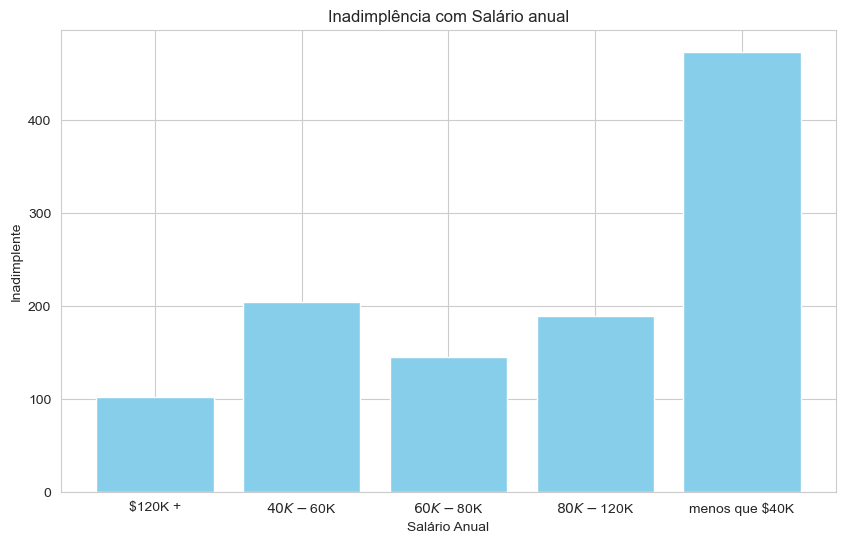

In [91]:
inadimplentes = df[df['default'] == 1]
df_default_x_salario = inadimplentes.groupby('salario_anual')['default'].sum()

plt.figure(figsize=(10, 6))
plt.bar(df_default_x_salario.index, df_default_x_salario.values, color='skyblue')
plt.xlabel('Salário Anual')
plt.ylabel('Inadimplente')
plt.title('Inadimplência com Salário anual')
plt.show()

#Aqui montamos um gráfico mostrando qual o salário anual dos inadimplentes
#Vemos que a maior parte se concentra na menor faixa salarial

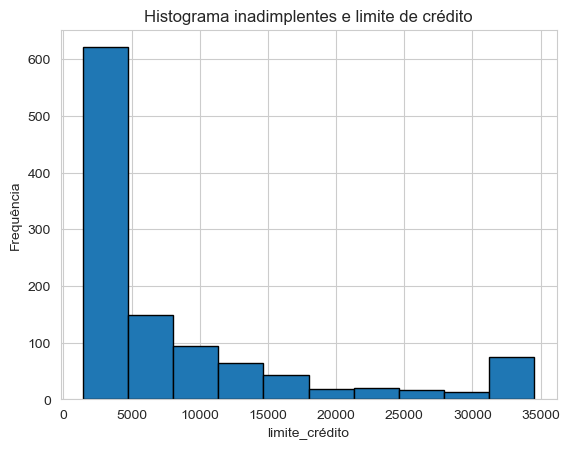

In [92]:
plt.hist(inadimplentes['limite_credito'], bins=10, edgecolor='black') 
plt.xlabel('limite_crédito')
plt.ylabel('Frequência')
plt.title('Histograma inadimplentes e limite de crédito')
plt.show()
#A maior parte dos inadimplentes possuem um limite de crédito baixo

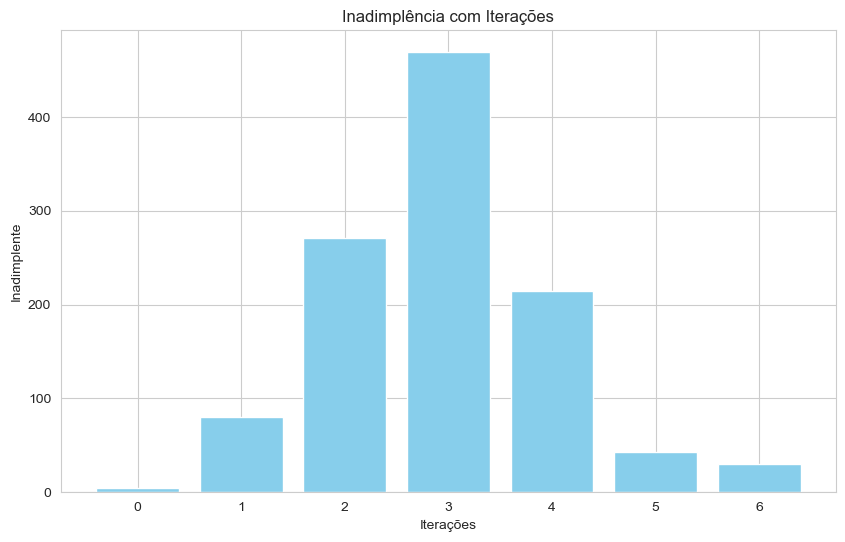

In [93]:
df_default_x_salario = inadimplentes.groupby('iteracoes_12m')['default'].sum()

plt.figure(figsize=(10, 6))
plt.bar(df_default_x_salario.index, df_default_x_salario.values, color='skyblue')
plt.xlabel('Iterações')
plt.ylabel('Inadimplente')
plt.title('Inadimplência com Iterações')
plt.show()
#Quando procuramos uma correlação entre a inadimplência com as iterações, vemos que a maior parte dos inadimplentes se 
##no range de 2 a 4 iterações, sendo 3 o mais relevante

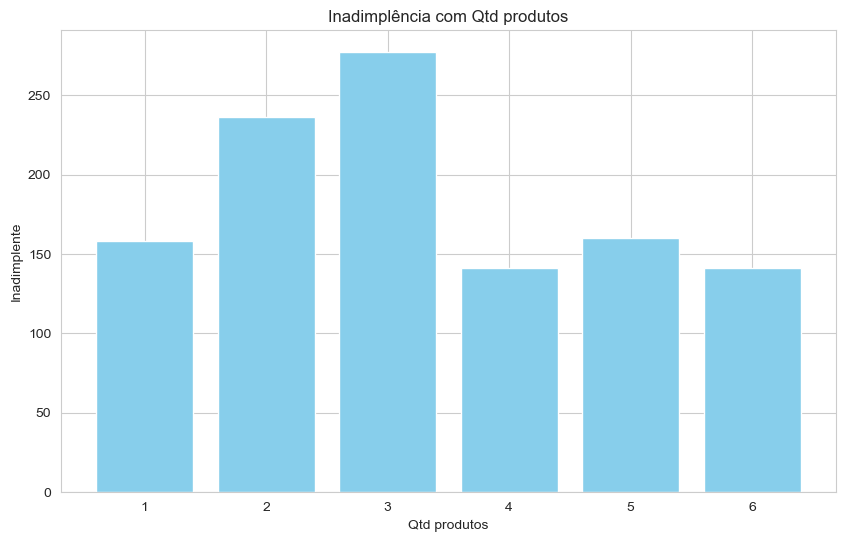

In [94]:
df_default_x_salario = inadimplentes.groupby('qtd_produtos')['default'].sum()

plt.figure(figsize=(10, 6))
plt.bar(df_default_x_salario.index, df_default_x_salario.values, color='skyblue')
plt.xlabel('Qtd produtos')
plt.ylabel('Inadimplente')
plt.title('Inadimplência com Qtd produtos')
plt.show()
#Os inadimplentes em boa parte possuem 2 ou 3 produtos. O restante da distribuição segue bem homogênea, ficando em cerca de 150
##inadimplentes em cada coluna

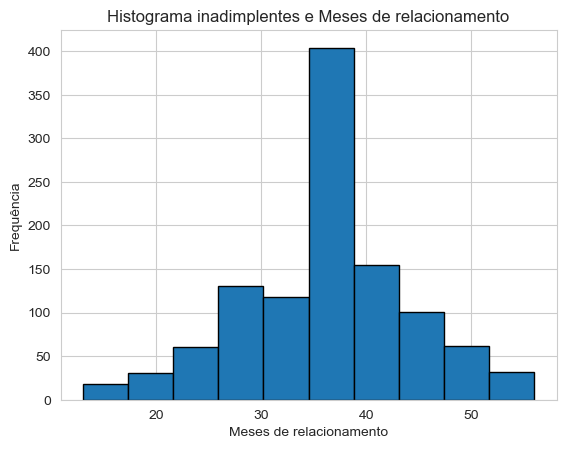

In [95]:
plt.hist(inadimplentes['meses_de_relacionamento'], bins=10, edgecolor='black') 
plt.xlabel('Meses de relacionamento')
plt.ylabel('Frequência')
plt.title('Histograma inadimplentes e Meses de relacionamento')
plt.show()
#A maior parte dos inadimplentes possuem entre 30 a 40 meses de relacionamento com a instituição

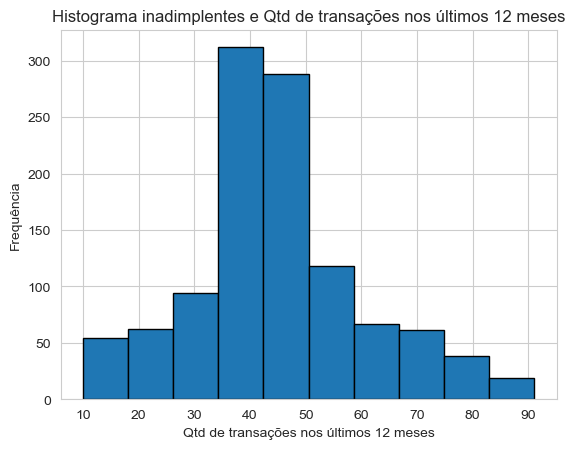

In [96]:
plt.hist(inadimplentes['qtd_transacoes_12m'], bins=10, edgecolor='black') 
plt.xlabel('Qtd de transações nos últimos 12 meses')
plt.ylabel('Frequência')
plt.title('Histograma inadimplentes e Qtd de transações nos últimos 12 meses')
plt.show()
#Grande concentração de inadimplentes com qtd de transações nos últimos 12 meses entre 35 a 50 transações

05. CONCLUSÃO / INSIGHTS

Com o estudo acima, foi possível encontrar alguns insights:

- A maior parte dos inadimplentes possuem salários menores que $40K;

- Clientes com limite de crédito menor tendem a se tornarem inadimplentes;

- O número de iterações também pode estar ligado com a inadimplência, sendo que entre os inadimplentes, boa parte deles tiveram 3 iterações nos últimos 12 meses;

- Entre os devedores, a maior parte possuíam 2 a 3 produtos;

- A inadimplência é maior em clientes que possuam de 30 a 40 meses de relacionamento com a instituição;

- Grande concentração de inadimplentes com qtd de transações nos últimos 12 meses entre 35 a 50 transações.